In [8]:
import pandas as pd
police_killings = pd.read_csv("police_killings.csv", encoding = "ISO-8859-1")
police_killings.head()

police_killings.columns

Index(['name', 'age', 'gender', 'raceethnicity', 'month', 'day', 'year',
       'streetaddress', 'city', 'state', 'latitude', 'longitude', 'state_fp',
       'county_fp', 'tract_ce', 'geo_id', 'county_id', 'namelsad',
       'lawenforcementagency', 'cause', 'armed', 'pop', 'share_white',
       'share_black', 'share_hispanic', 'p_income', 'h_income',
       'county_income', 'comp_income', 'county_bucket', 'nat_bucket', 'pov',
       'urate', 'college'],
      dtype='object')

In [9]:
killing_by_ethnicity = police_killings["raceethnicity"].value_counts()
print(killing_by_ethnicity)

White                     236
Black                     135
Hispanic/Latino            67
Unknown                    15
Asian/Pacific Islander     10
Native American             4
Name: raceethnicity, dtype: int64


([<matplotlib.axis.XTick at 0x7fab94588710>,
 <a list of 6 Text xticklabel objects>)

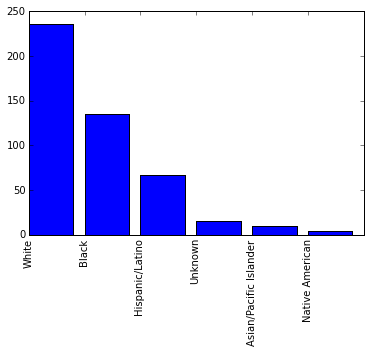

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.bar(range(6), killing_by_ethnicity)
plt.xticks(range(6), killing_by_ethnicity.index, rotation = "vertical" )

In [11]:
killing_by_ethnicity/sum(killing_by_ethnicity)

White                     0.505353
Black                     0.289079
Hispanic/Latino           0.143469
Unknown                   0.032120
Asian/Pacific Islander    0.021413
Native American           0.008565
Name: raceethnicity, dtype: float64

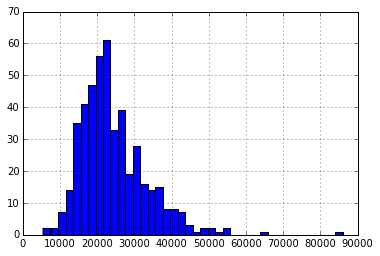

In [12]:
# created new panda series called "income". which contains all the values from the p_income column, except the dashes (-).
income = police_killings["p_income"][police_killings["p_income"] != "-"]

# Convert income to an integer type using the astype() method.
income = income.astype(float)

#Use the hist() method on income to generate a histogram.
#Bigger number with "bins" gives more granular look.
income.hist(bins=40)

In [13]:
income.median()

22348.0

median personal income in the US is 28,567, and our median is 22,348, which means that shootings tend to happen in less affluent areas

In [14]:
#Read in state_population.csv as a Dataframe and assign to the state_pop variable
state_pop = pd.read_csv("state_population.csv")

#Use the value_counts() method on the state_fp column of police_killings. 
counts = police_killings["state_fp"].value_counts()

# merge state_pop and counts. You can use the merge()
# but first Create a new Dataframe called states.
# One column should be called STATE, and will contain the index of counts. The other
#column should be called shootings, and will contains the values from counts. 
states = pd.DataFrame({"STATE": counts.index, "shootings":counts})

states = states.merge(state_pop, on="STATE")

states["pop_millions"] = states["POPESTIMATE2015"] / 1000000

states["rate"] = states["shootings"] / states["pop_millions"]

states.sort("rate")



/opt/dsserver/lib/python3.4/site-packages/ipykernel/__main__.py:19: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,STATE,shootings,SUMLEV,REGION,DIVISION,NAME,POPESTIMATE2015,POPEST18PLUS2015,PCNT_POPEST18PLUS,pop_millions,rate
43,9,1,40,1,1,Connecticut,3590886,2826827,78.7,3.590886,0.278483
22,42,7,40,1,2,Pennsylvania,12802503,10112229,79.0,12.802503,0.546768
38,19,2,40,2,4,Iowa,3123899,2395103,76.7,3.123899,0.640226
6,36,13,40,1,2,New York,19795791,15584974,78.7,19.795791,0.656705
29,25,5,40,1,1,Massachusetts,6794422,5407335,79.6,6.794422,0.735898
42,33,1,40,1,1,New Hampshire,1330608,1066610,80.2,1.330608,0.751536
45,23,1,40,1,1,Maine,1329328,1072948,80.7,1.329328,0.752260
11,17,11,40,2,3,Illinois,12859995,9901322,77.0,12.859995,0.855366
12,39,10,40,2,3,Ohio,11613423,8984946,77.4,11.613423,0.861073
31,55,5,40,2,3,Wisconsin,5771337,4476711,77.6,5.771337,0.866350


States in the midwest and south seem to have the highest police killing rates, whereas those in the northeast seem to have the lowest.

In [19]:
pk = police_killings[
    (police_killings["share_white"]!="-") &
    (police_killings["share_black"]!="-") &
    (police_killings["share_hispanic"] !="-")
    ]
pk["share_white"] = pk["share_white"].astype(float)
pk["share_black"] = pk["share_black"].astype(float)
pk["share_hispanic"] = pk["share_hispanic"].astype(float)


/opt/dsserver/lib/python3.4/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/dsserver/lib/python3.4/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/dsserver/lib/python3.4/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-vie

In [22]:
lowest_states = ["CT", "PA", "IA", "NY", "MA", "NH", "ME", "IL", "OH", "WI"]
highest_states = ["OK", "AZ", "NE", "HI", "AK", "ID", "NM", "LA", "CO", "DE"]

# isin() method to perform this split.
ls = pk[pk["state"].isin(lowest_states)]
hs = pk[pk["state"].isin(highest_states)]

In [24]:
columns = ["pop", "county_income", "share_white", "share_black", "share_hispanic"]

ls[columns].mean()

pop                4201.660714
county_income     54830.839286
share_white          60.616071
share_black          21.257143
share_hispanic       12.948214
dtype: float64

In [26]:
hs[columns].mean()

pop                4315.750000
county_income     48706.967391
share_white          55.652174
share_black          11.532609
share_hispanic       20.693478
dtype: float64

In [28]:
hs.describe()

,day,year,latitude,longitude,state_fp,county_fp,tract_ce,geo_id,county_id,pop,share_white,share_black,share_hispanic,h_income,county_income,comp_income,county_bucket,nat_bucket,urate,college
count,92.000000,92.0,92.000000,92.000000,92.000000,92.000000,92.000000,9.200000e+01,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,84.000000,92.000000,92.000000,92.000000
mean,15.630435,2015.0,35.692503,-105.901915,19.619565,46.086957,237207.445652,1.966589e+10,19665.652174,4315.750000,55.652174,11.532609,20.693478,43327.152174,48706.967391,0.899455,2.476190,2.260870,0.102894,0.222367
std,9.030738,0.0,5.941451,15.627488,14.757261,42.203237,361762.631538,1.478322e+10,14783.200649,2063.723609,24.406158,19.591303,20.415690,17537.586163,9839.206872,0.334014,1.366344,1.175478,0.060407,0.141249
min,1.000000,2015.0,19.915194,-159.642700,2.000000,1.000000,100.000000,2.020001e+09,2020.000000,403.000000,2.100000,0.000000,0.000000,15293.000000,25498.000000,0.330230,1.000000,1.000000,0.011335,0.035051
25%,7.000000,2015.0,33.349889,-111.806766,4.000000,13.000000,2450.000000,4.021002e+09,4021.000000,2886.000000,39.175000,0.675000,4.350000,32509.250000,42987.000000,0.646527,1.000000,1.000000,0.061153,0.120008
50%,16.000000,2015.0,35.268585,-104.943293,16.000000,27.000000,21803.500000,1.601401e+10,16014.000000,4257.500000,58.200000,2.700000,10.850000,39825.500000,48801.000000,0.856491,2.000000,2.000000,0.089227,0.190484
75%,24.000000,2015.0,38.602924,-95.993210,35.000000,72.500000,379650.000000,3.503322e+10,35032.500000,5377.000000,74.200000,11.550000,31.725000,53574.750000,53596.000000,1.079215,4.000000,3.000000,0.127920,0.271616
max,30.000000,2015.0,61.218408,-75.456352,40.000000,143.000000,978400.000000,4.014301e+10,40143.000000,13561.000000,95.900000,93.100000,81.500000,111464.000000,77454.000000,2.308703,5.000000,5.000000,0.324444,0.824971
